In [16]:
import pathlib

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [35]:
data_dir = pathlib.Path('~/data/undeepwaves')
output_path = data_dir / 'U01D000Lp100Tz0e+00a' / 'results' / 'U01D000Lp100Tz0e+00a.nc'
output_path = data_dir / 'U20D006Lp1577Tz1672d' / 'results' / 'U20D006Lp1577Tz1672d.nc'

# format is matlab txt files. Not easy to read

# read data (will have nans in missing spots)
result = pd.read_csv(output_path, delim_whitespace=True, header=None)

# to vector
result = result.values.flatten()

# remove nans
result = result[~np.isnan(result)]

# reshape back
result = np.reshape(result, (-1, 256, 256))

In [36]:
result.shape

(17, 256, 256)

In [37]:
variables = pd.read_json('variables.json', typ='series')
variables

XP                                            x -coordinate
YP                                            y -coordinate
BOTLEV                                  bottom level (in m)
HSIG                         significant wave height (in m)
TPS                           'smoothed' peak period (in s)
RTP       peak period (in s) of the variance density spe...
TMM10                      mean absolute wave period (in s)
TM01                       mean absolute wave period (in s)
TM02              mean absolute zero-crossing period (in s)
DIR                                     mean wave direction
DSPR        directional spreading of the waves (in degrees)
DHS       directional spreading of the significant wave ...
DRTM01    the difference in average wave period (RTM01) ...
WATLEV                                   water level (in m)
WIND                 wind velocity (vector; in m/s) -> Vect
WLEN                             average wave length (in m)
dtype: object

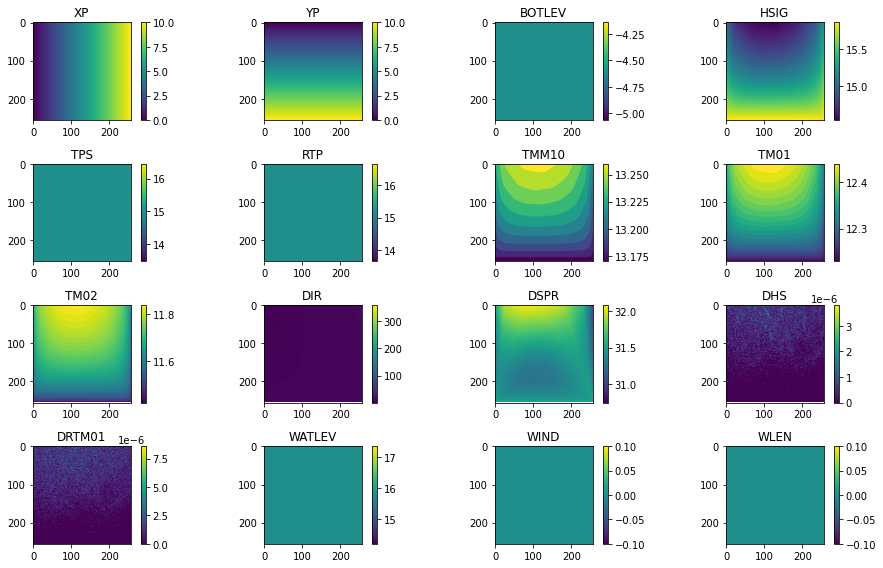

In [38]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(13, 8))
for ax, var, arr in zip(axes.flat, variables.index, result):
    im = ax.imshow(arr)
    ax.set_title(var)
    plt.colorbar(im, ax=ax)
fig.tight_layout()

